In [1]:
import os
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw


# Directory paths
train_dir = "archive (1)/train"
test_dir = "archive (1)/val"
val_dir = "archive (1)/test" 

print("Train directory exists:", os.path.exists(train_dir))
print("Test directory exists:", os.path.exists(test_dir))
print("Validation directory exists:", os.path.exists(val_dir))

# Function to read the JSON file and extract the polygon coordinates and label
def read_polygon_coordinates_and_label_from_json(json_path):
    with open(json_path) as f:
        data = json.load(f)
    polygons = data["shapes"]
    coordinates = []
    labels = []
    for polygon in polygons:
        points = polygon["points"]
        # Flatten the points list
        points = [coord for sublist in points for coord in sublist]
        label = polygon["label"]  # Extract the label from each shape object
        coordinates.append(points)
        labels.append(label)
    return coordinates, labels

# Generate Mask
def generate_masks(image_size, coordinates):
    masks = []
    for points in coordinates:
        mask = Image.new("L", image_size, 0)
        ImageDraw.Draw(mask).polygon(points, outline=1, fill=1)
        masks.append(np.array(mask))
    return masks

# Function to get image paths, masks, and labels
def get_image_paths_masks_and_labels(directory):
    image_paths = []
    masks = []
    labels = []
    for image_path in glob.glob(os.path.join(directory, "*.jpg")):
        json_path = image_path.replace(".jpg", ".json")
        if os.path.exists(json_path):
            coordinates, label = read_polygon_coordinates_and_label_from_json(json_path)
            image = Image.open(image_path)
            image_size = image.size
            image_paths.append(image_path)
            masks.extend(generate_masks(image_size, coordinates))
            labels.append(label)  
    return image_paths, masks, labels

# Get image paths, masks, and labels for train, test, and validation sets
train_image_paths, train_masks, train_labels = get_image_paths_masks_and_labels(train_dir)
test_image_paths, test_masks, test_labels = get_image_paths_masks_and_labels(test_dir)
val_image_paths, val_masks, val_labels = get_image_paths_masks_and_labels(val_dir)

Train directory exists: True
Test directory exists: True
Validation directory exists: True


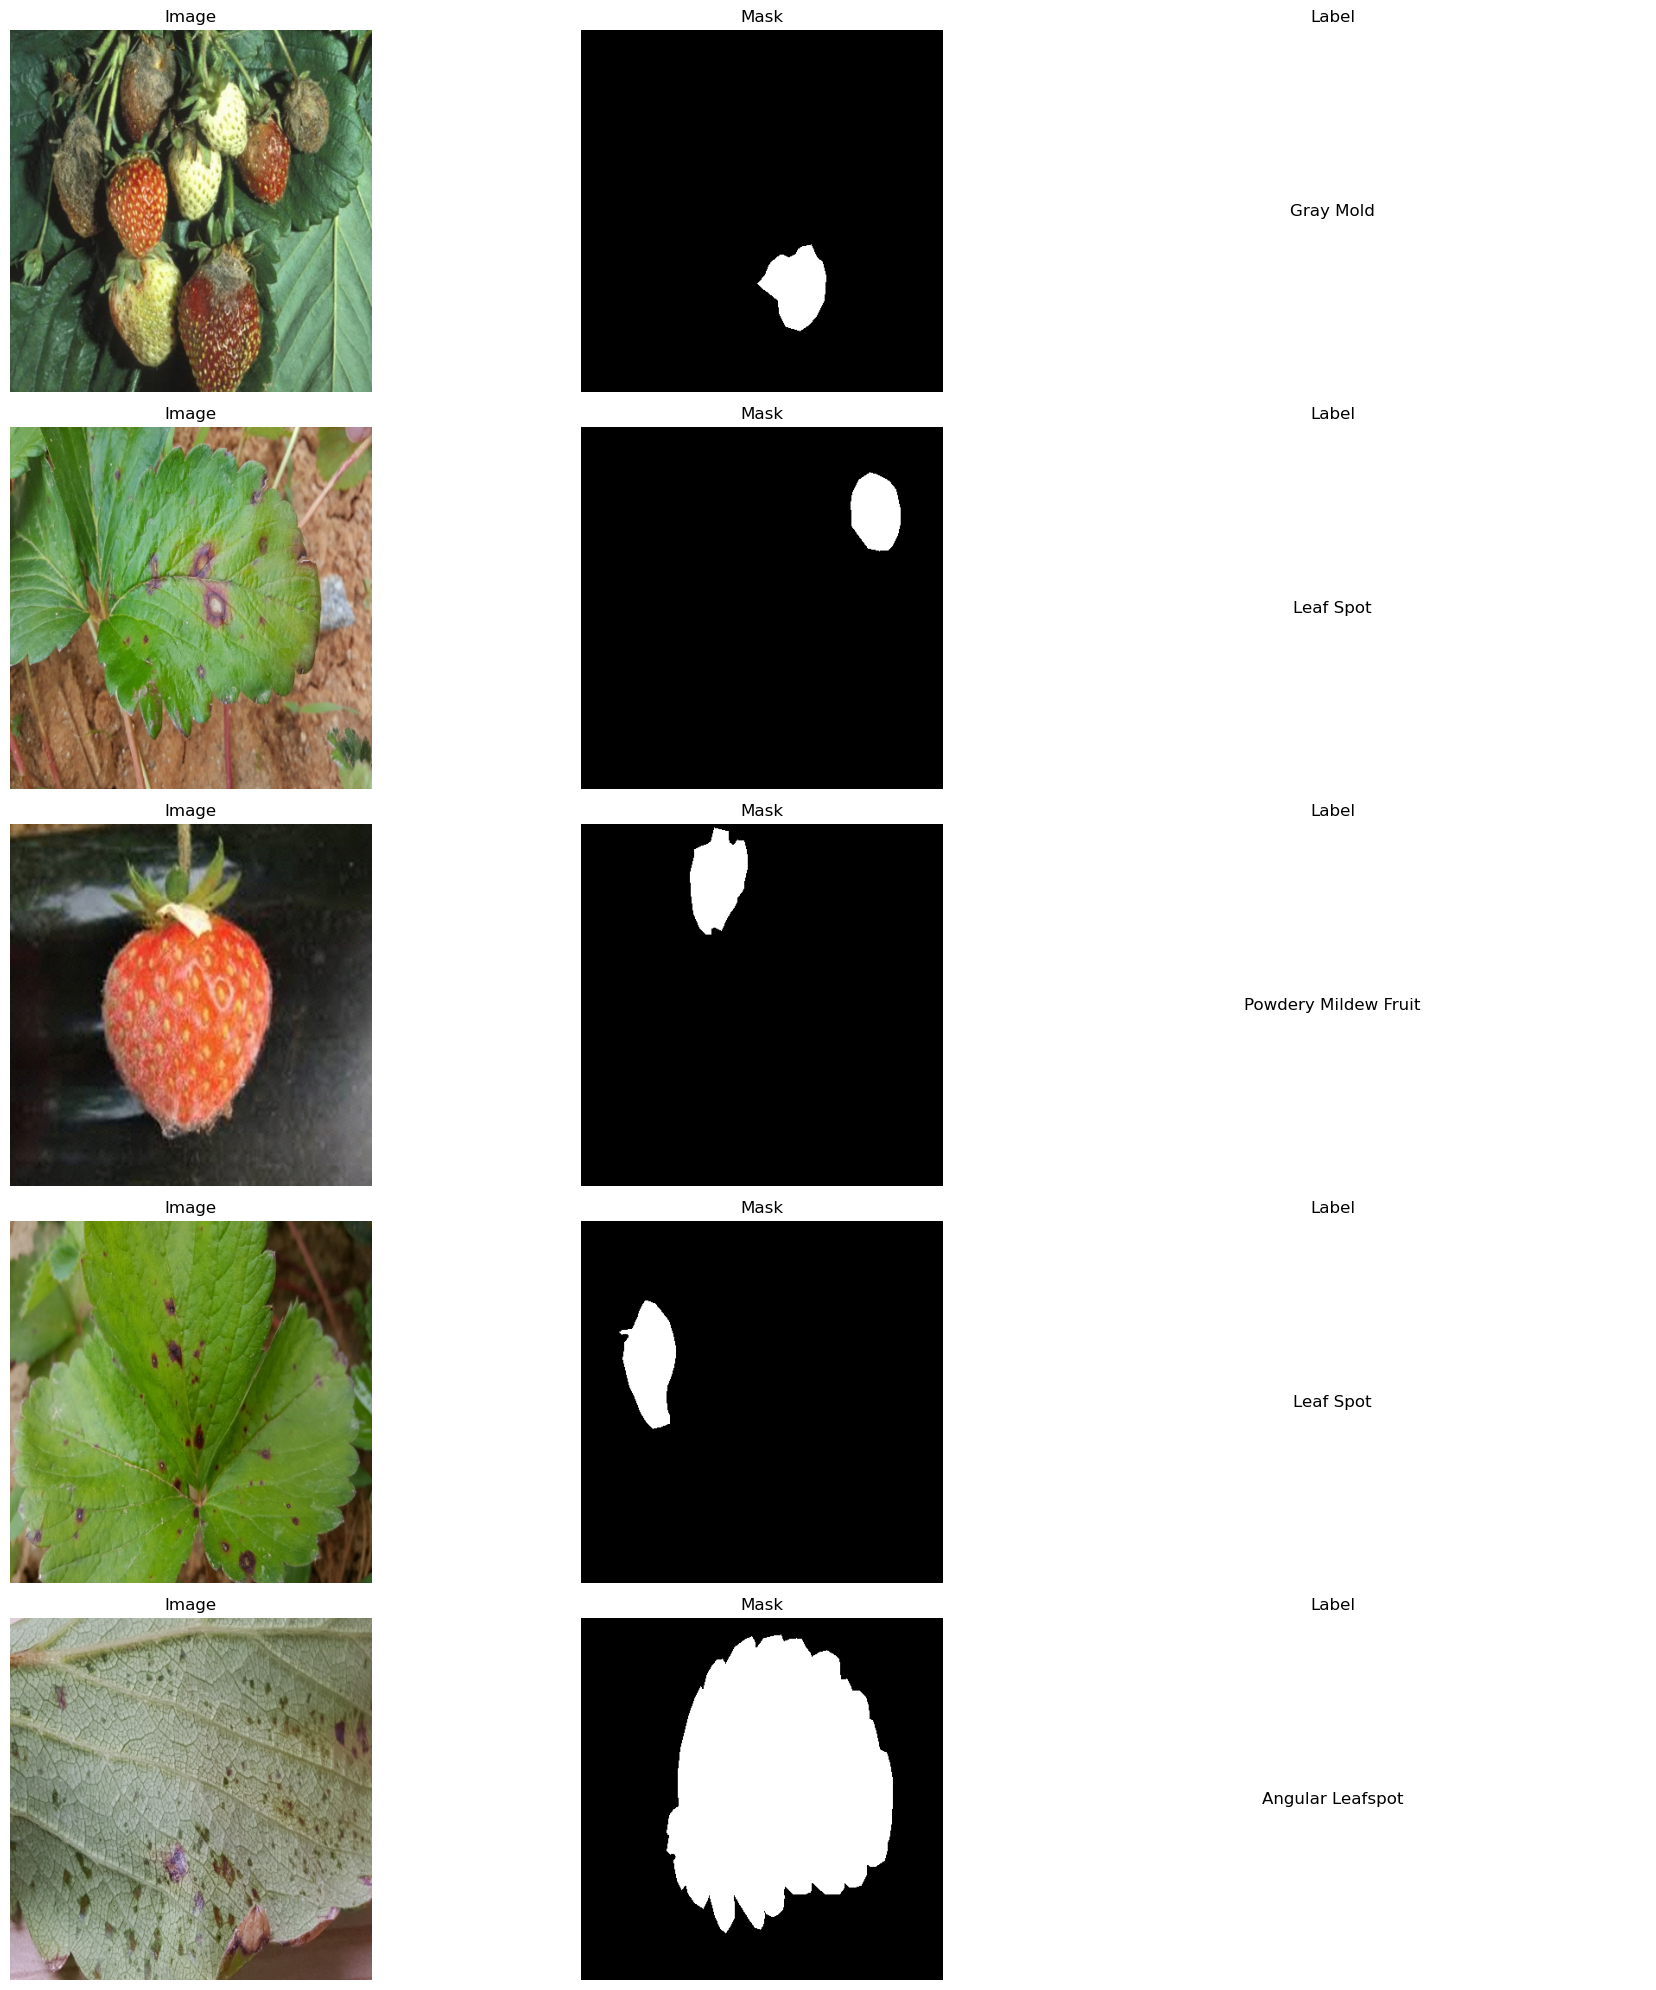

In [2]:
# Print some sample images with masks and labels
num_samples = 5
sample_images = train_image_paths[:num_samples]
sample_masks = train_masks[:num_samples]
sample_labels = train_labels[:num_samples]

# Plot the sample images with masks and labels
fig, axs = plt.subplots(num_samples, 3, figsize=(18, 4 * num_samples))
for i in range(num_samples):
    image_path = sample_images[i]
    mask = sample_masks[i]
    labels = sample_labels[i]
    image = plt.imread(image_path)
    axs[i, 0].imshow(image)
    axs[i, 0].set_title("Image")
    axs[i, 0].axis("off")
    axs[i, 1].imshow(mask, cmap="gray")
    axs[i, 1].set_title("Mask")
    axs[i, 1].axis("off")
    
    # Extract a single label from the list of labels
    label = labels[0] if isinstance(labels, list) else labels
    
    axs[i, 2].text(0.5, 0.5, label, ha="center", va="center", fontsize=12)
    axs[i, 2].set_title("Label")
    axs[i, 2].axis("off")

plt.tight_layout()
# Save the plot as an image file
plt.savefig("sample_Stawberry_disease_images_plot.png")
plt.show()